In [1]:
#Observable Trends
    #higher latitudes have higher windspeeds
    #tempature is consistently higher in the souther hemisphere and is steadily decreases the further north of the equator
    #the lower the cloudiness the higher the humidity

In [2]:
#Import Dependencies
import pandas as pd
import numpy as np
import random
from config import api_key
from citipy import citipy
import openweathermapy as owm

import matplotlib.pyplot as plt
import matplotlib
plt.style.use("seaborn")

#import requests

In [3]:
lat = []
long = []


#generate random number for latitute, range from -90 to 90
for x in range(2000):
    lat.append(random.uniform(-90,90))

#gnerate randome numbers for long, range form -180 to 180
for x in range(2000):
    long.append(random.uniform(-180,180))
    
locations_df = pd.DataFrame({"Latitude": lat, "Longitude": long})
locations_df.head()


,Latitude,Longitude
0,12.358289,-149.917143
1,53.526634,-31.542598
2,-70.445868,-133.293850
3,-79.522890,-43.761220
4,13.160657,-113.970853


In [4]:
#Using citipy to get the closest city:

for index,row in locations_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    locations_df.set_value(index,"City",city.city_name)
    locations_df.set_value(index,"Country code",city.country_code)

#Dropping the lat and long column from the dataframe (not the actual coordinates of the cities)
clean_locations_df = locations_df.drop(['Latitude', 'Longitude'],axis=1)

#Dropping duplicate any cities in dataframe
clean_locations_df = clean_locations_df.drop_duplicates()

clean_locations_df.head()

/Users/annabower/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Users/annabower/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,City,Country code
0,hilo,us
1,tasiilaq,gl
2,rikitea,pf
3,ushuaia,ar
4,cabo san lucas,mx


In [5]:
# Picking a sample of 500 cities to proceed with analysis
sample_locations = clean_locations_df.sample(500)

sample_locations = sample_locations.reset_index(drop=True)
sample_locations.head()

,City,Country code
0,lawton,us
1,klyuchi,ru
2,colac,au
3,aflu,dz
4,yar-sale,ru


In [6]:
settings = {"units": "metric", "appid": api_key}

# Get weather
    
for index,row in sample_locations.iterrows():
    try:
        raw_data = owm.get_current(row["City"], **settings)      
        sample_locations.set_value(index,"Latitude",raw_data.get("coord",{}).get("lat"))
        sample_locations.set_value(index,"Longitude",raw_data.get("coord",{}).get("lon"))
        sample_locations.set_value(index,"Temperature",raw_data.get("main",{}).get("temp"))
        sample_locations.set_value(index,"Wind speed",raw_data.get("wind",{}).get("speed"))
        sample_locations.set_value(index,"Humidity",raw_data.get("main",{}).get("humidity"))
        sample_locations.set_value(index,"Cloudiness",raw_data.get("clouds",{}).get("all"))
    except:
        pass  


    
#Multiply by 9, then divide by 5, then add 32
for index,row in sample_locations.iterrows():
    F_temp = ((row["Temperature"]*9/5)+32)
    sample_locations.set_value(index, "Temperature", F_temp)
sample_locations.head()

/Users/annabower/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/annabower/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/annabower/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/annabower/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/annabower/anaconda3/lib/pyt

,City,Country code,Latitude,Longitude,Temperature,Wind speed,Humidity,Cloudiness
0,lawton,us,34.61,-98.39,34.520,1.50,74.0,90.0
1,klyuchi,ru,52.25,79.17,31.082,5.16,72.0,76.0
2,colac,au,-38.34,143.59,59.972,1.86,79.0,92.0
3,aflu,dz,NaN,NaN,NaN,NaN,NaN,NaN
4,yar-sale,ru,66.83,70.83,-0.328,7.11,78.0,20.0


In [7]:
#removing cities with no data
sample_locations = sample_locations.dropna()

sample_locations.to_csv("sample_weather_data.csv")

In [8]:
# Plot settings
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

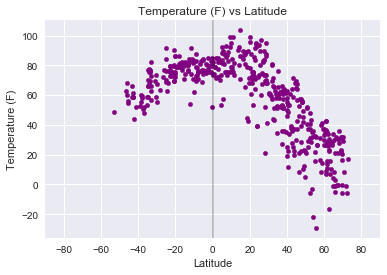

In [9]:
# Temperature vs Latitude 
sample_locations.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="purple")
set_plot_prop("Latitude",[-90,90],"Temperature (F)")
plt.axvline(0, color='black',alpha=0.25)
plt.savefig("Temperature vs Latitude")
plt.show()

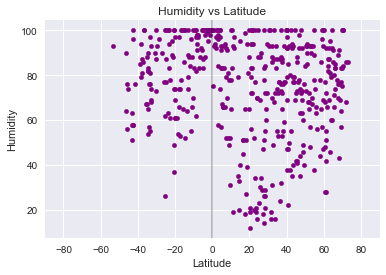

In [10]:
# Humidity vs Latitude 
sample_locations.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="purple")
set_plot_prop("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.25)
plt.savefig("Humidity vs Latitude")
plt.show()

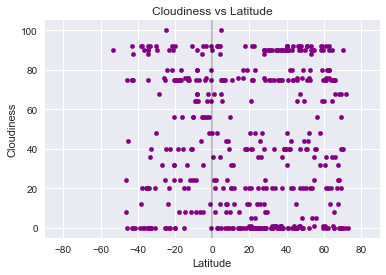

In [11]:
# Cloudiness vs Latitude
sample_locations["Cloudiness"] = pd.to_numeric(sample_locations["Cloudiness"])
sample_locations.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="purple")
set_plot_prop("Latitude",[-90,90],"Cloudiness")
plt.axvline(0, color='black',alpha=0.25)
plt.savefig("Cloudiness vs Latitude")
plt.show()

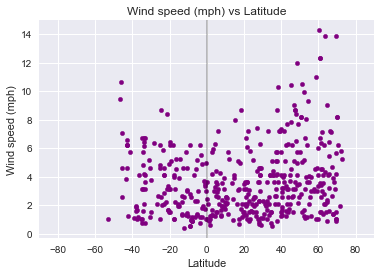

In [12]:
# Wind speed vs Latitude
sample_locations["Wind speed"] = pd.to_numeric(sample_locations["Wind speed"])
sample_locations.plot(kind="scatter",x="Latitude",y="Wind speed",grid=True,color="purple")
set_plot_prop("Latitude",[-90,90],"Wind speed (mph)")
plt.axvline(0, color='black',alpha=0.25)
plt.savefig("Wind speed vs Latitude")
plt.show()